In [ ]:
pip install emukit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 13.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emukit: filename=emukit-0.4.10-py3-none-any.whl size=257056 sha256=69727a1e8ef86d6c6b6f5b1302ac3aa7f41b1a4c0df7281a35392896e0669f00
  Stored in directory: /root/.cache/pip/wheels/30/d1/af/64ddede19b5eb77bd70362edebf9d393bf77dc34d354c11292
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102548 sha256=0b359405f389078b8d3865b62bcef0c64408208cca93ed8ac131f46192f91394
  Stored in directory: /root/.cache/pip/wheels/d2/

In [ ]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

In [ ]:
pip install GPy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
#DNS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/LinewssDNS.csv')
#RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/LinewssRANS.csv')
DNS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/lineexploitDNSzero.csv')
RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/lineexploitRANSzero.csv')
#
# RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/WSSLowcostRANS_zero.csv')




Mounted at /content/drive


In [ ]:
# Generate sample data

x_train_l =  np.array([[70,100],[70,80],[70,50],[70,30],[70,0],[60,100],[60,80],[60,50],[60,30],[60,0],[50,100],[50,80],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,30],[40,0]])
x_train_h = np.array([[70,100],[70,0],[60,80],[50,50],[40,100],[40,0]])

DNS_full=DNS_data.dropna(axis=1)
DNS_full=DNS_full.values
DNS=DNS_full[:,[0,2,3,7,8,10]]
DNS=DNS[50:100,:]

DNS_test=DNS_full[:,[1,4,5,6,9]]
DNS_test=DNS_test[50:100,:]

RANS=RANS_data.dropna(axis=1)
RANS_full=RANS.values

RANS_test=RANS_full[:,[0,1,3,4,5,6,7,10,12,13,14,15,16,17,19]]
RANS=RANS_full[50:100,:]
RANS_test=RANS_test[50:100,:]
#D_70_100=np.array(DNS_data['70_100'])
#D_70_100=D_70_100.reshape(-1,1)
#np.stack(())
#print(column_values.shape)

DNS_full=np.transpose(DNS_full)
y_train_h=np.transpose(DNS)
y_train_l=np.transpose(RANS)


print(np.shape(y_train_h))
print(np.shape(y_train_l))

(6, 50)
(20, 50)


In [ ]:
# CI = np.ones(c[1])*1.96*hf_std_lin_mf_model[i,:].reshape(-1,1)
# CI=CI.T
# print(CI.shape)


In [ ]:
# x_train_l=np.c_[ x_train_l, np.zeros(len(x_train_l)) ]
# x_train_h=np.c_[ x_train_h, np.ones(len(x_train_h)) ]
# X_train=np.append(x_train_l,x_train_h,axis=0)
#
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays

# Y_train=np.append(y_train_h,y_train_l,axis=0)
X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], [y_train_l, y_train_h])
print(X_train.shape)
print(Y_train.shape)

print(X_train)

(26, 3)
(26, 50)
[[ 70. 100.   0.]
 [ 70.  80.   0.]
 [ 70.  50.   0.]
 [ 70.  30.   0.]
 [ 70.   0.   0.]
 [ 60. 100.   0.]
 [ 60.  80.   0.]
 [ 60.  50.   0.]
 [ 60.  30.   0.]
 [ 60.   0.   0.]
 [ 50. 100.   0.]
 [ 50.  80.   0.]
 [ 50.  50.   0.]
 [ 50.  30.   0.]
 [ 50.   0.   0.]
 [ 40. 100.   0.]
 [ 40.  80.   0.]
 [ 40.  50.   0.]
 [ 40.  30.   0.]
 [ 40.   0.   0.]
 [ 70. 100.   1.]
 [ 70.   0.   1.]
 [ 60.  80.   1.]
 [ 50.  50.   1.]
 [ 40. 100.   1.]
 [ 40.   0.   1.]]


In [ ]:
## Create standard GP model using only high-fidelity data
x_train_DNS=x_train_h
y_train_DNS=y_train_h
kernelDNS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,5.0],variance=0.0001, ARD=True)
kernelDNS.lengthscale.constrain_bounded(0,10000)
kernelDNS.variance.constrain_bounded(0,10)
high_gp_model = GPy.models.GPRegression(x_train_DNS, y_train_DNS, kernelDNS)
high_gp_model.Gaussian_noise.fix(0.0001)

## Fit the GP model

high_gp_model.optimize_restarts(100)


Optimization restart 1/100, f = -766.0542802234806
Optimization restart 2/100, f = -766.0542812318588
Optimization restart 3/100, f = -766.0542476415374
Optimization restart 4/100, f = -766.054279945229
Optimization restart 5/100, f = -766.0536189224702
Optimization restart 6/100, f = -766.0542800597851
Optimization restart 7/100, f = -766.0542604167031
Optimization restart 8/100, f = -766.0442672645515
Optimization restart 9/100, f = -766.0542805951894
Optimization restart 10/100, f = -766.0542758273698
Optimization restart 11/100, f = -766.0524218820331
Optimization restart 12/100, f = -766.0537241400873
Optimization restart 13/100, f = -766.0542810693662
Optimization restart 14/100, f = -766.0542772745322
Optimization restart 15/100, f = -766.0542812425895
Optimization restart 16/100, f = -766.0542805697518
Optimization restart 17/100, f = -766.0542812420072
Optimization restart 18/100, f = -766.0542801982078
Optimization restart 19/100, f = -766.0542812425902
Optimization restart 2

In [ ]:
print(high_gp_model.ExpQuad.lengthscale[0])
print(high_gp_model.ExpQuad.lengthscale[1])
print(high_gp_model.ExpQuad.variance)
print(high_gp_model.gradient)
# Get the gradients of optimization
gradients_dns = high_gp_model.gradient

# Get the names of the model's parameters
parameter_dns = high_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_dns)):
    print(f"Parameter: {parameter_dns[i]} - Gradient: {gradients_dns[i]}")


43.73233195244323
10000.0
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                      0.00675450  |   0.0,10.0    |        
[ 1.43763845e-04 -1.67128762e-07  2.29576839e-05 -5.41605684e+05]
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 0.00014376384495159246
Parameter: ExpQuad.lengthscale - Gradient: -1.671287615687949e-07
Parameter: Gaussian_noise.variance - Gradient: 2.2957683876861276e-05


In [ ]:
## Create standard GP model using only low-fidelity data

x_train_RANS= np.array([[70,100],[70,80],[70,30],[70,0],[60,100],[60,80],[60,50],[50,100],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,0]])

y_train_RANS=np.transpose(RANS_test)
print(y_train_RANS.shape)

(15, 50)


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = high_gp_model.input_sensitivity()

# Calculate the sum of sensitivity indices
sensitivity_sum = sum(sensitivity)

# Normalize the sensitivity indices
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Calculate the total Sobol indices
total_sobol_indices = [index ** 2 for index in normalized_sensitivity]

# Normalize the total Sobol indices
total_sobol_sum = sum(total_sobol_indices)
normalized_total_sobol_indices = [index / total_sobol_sum for index in total_sobol_indices]

# Print the normalized total Sobol indices
print("Normalized Total Sobol Indices:")
for i, sobol_index in enumerate(normalized_total_sobol_indices):
    print(f"Variable {i+1}: {sobol_index}")


Normalized Total Sobol Indices:
Variable 1: 0.9999999996342279
Variable 2: 3.657720730791279e-10


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = high_gp_model.input_sensitivity()

# Normalize the sensitivity indices
sensitivity_sum = sum(sensitivity)
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Print the normalized sensitivity indices
print("Normalized Sensitivity Indices:")
for i, sensitivity_index in enumerate(normalized_sensitivity):
    print(f"Variable {i+1}: {sensitivity_index}")

Normalized Sensitivity Indices:
Variable 1: 0.9999808751971851
Variable 2: 1.912480281490898e-05


In [ ]:
kernelRANS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.05, ARD=True)
kernelRANS.lengthscale.constrain_bounded(0,1000)
kernelRANS.variance.constrain_bounded(0,10)
low_gp_model = GPy.models.GPRegression(x_train_RANS, y_train_RANS, kernelRANS)
low_gp_model.Gaussian_noise.fix(0.001)

## Fit the GP model


low_gp_model.optimize_restarts(500)

Optimization restart 1/500, f = -1613.0932509472134
Optimization restart 2/500, f = -1613.3635363823687


 /usr/local/lib/python3.10/dist-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 3/500, f = -1613.3635374249448
Optimization restart 4/500, f = -1613.3625943898508
Optimization restart 5/500, f = -1613.3600498041128
Optimization restart 6/500, f = -1613.3635344713257
Optimization restart 7/500, f = -1554.1739492933953
Optimization restart 8/500, f = -1613.359524556562
Optimization restart 9/500, f = -1613.3635377118633
Optimization restart 10/500, f = -1613.358899978745
Optimization restart 11/500, f = -1613.3635269494534
Optimization restart 12/500, f = -1609.5200249855318
Optimization restart 13/500, f = -1613.3635340133408
Optimization restart 14/500, f = -1613.3635209967936
Optimization restart 15/500, f = -1613.3619669195916
Optimization restart 16/500, f = -1613.363535652922
Optimization restart 17/500, f = -1613.3634617410662
Optimization restart 18/500, f = -1613.3635366329263
Optimization restart 19/500, f = -1613.3576631571093
Optimization restart 20/500, f = -1613.3635305283103
Optimization restart 21/500, f = -1613.3635157003253
Opt

In [ ]:
print(low_gp_model.ExpQuad.lengthscale[0])
print(low_gp_model.ExpQuad.lengthscale[1])
print(low_gp_model.ExpQuad.variance)

# Get the gradients of optimization
gradients_rans = low_gp_model.gradient

# Get the names of the model's parameters
parameter_rans = low_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_rans)):
    print(f"Parameter: {parameter_rans[i]} - Gradient: {gradients_rans[i]}")


37.14621194929583
999.9997889030733
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                      0.00246494  |   0.0,10.0    |        
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 0.0017142649221000075
Parameter: ExpQuad.lengthscale - Gradient: -2.981741941977607e-07
Parameter: Gaussian_noise.variance - Gradient: 0.0006814336487977129


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = low_gp_model.input_sensitivity()

# Normalize the sensitivity indices
sensitivity_sum = sum(sensitivity)
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Print the normalized sensitivity indices
print("Normalized Sensitivity Indices:")
for i, sensitivity_index in enumerate(normalized_sensitivity):
    print(f"Variable {i+1}: {sensitivity_index}")

Normalized Sensitivity Indices:
Variable 1: 0.9986220596946747
Variable 2: 0.0013779403053253507


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = low_gp_model.input_sensitivity()

# Calculate the sum of sensitivity indices
sensitivity_sum = sum(sensitivity)

# Normalize the sensitivity indices
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Calculate the total Sobol indices
total_sobol_indices = [index ** 2 for index in normalized_sensitivity]

# Normalize the total Sobol indices
total_sobol_sum = sum(total_sobol_indices)
normalized_total_sobol_indices = [index / total_sobol_sum for index in total_sobol_indices]

# Print the normalized total Sobol indices
print("Normalized Total Sobol Indices:")
for i, sobol_index in enumerate(normalized_total_sobol_indices):
    print(f"Variable {i+1}: {sobol_index}")


Normalized Total Sobol Indices:
Variable 1: 0.9999980960406605
Variable 2: 1.903959339497917e-06


In [ ]:
# Print the interaction terms
print("Interaction Terms:")
for i in range(len(sensitivity)):
    for j in range(i+1, len(sensitivity)):
        interaction = sensitivity[i] * sensitivity[j]
        print(f"Variable {i+1} x Variable {j+1}: {interaction}")


Interaction Terms:
Variable 1 x Variable 2: 4.403345202085343e-15


In [ ]:
kernels = [GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.005, ARD=True),GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.005, ARD=True)]
# for kernel in kernels:
#     kernel.lengthscale.constrain_bounded(0, 50)
#     kernel.variance.constrain_bounded(0, 10)
for i, kernel in enumerate(kernels):
    if i == 0:  # First fidelity
        kernel.lengthscale.constrain_bounded(0,1000)
        kernel.variance.constrain_bounded(0, 5)
    elif i == 1:  # Second fidelity
        kernel.lengthscale.constrain_bounded(0, 1000)
        kernel.variance.constrain_bounded(0, 10)
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)

gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)

gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0.01)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0.0001)

lin_mf_model =model=GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=200)

## Fit the model

lin_mf_model.optimize()

Optimization restart 1/200, f = -2126.9594731753245
Optimization restart 2/200, f = -2126.9594730163067
Optimization restart 3/200, f = -2126.9594705335558
Optimization restart 4/200, f = -2126.954845207158
Optimization restart 5/200, f = -2071.186263863187
Optimization restart 6/200, f = -2126.959455727822
Optimization restart 7/200, f = -2126.9594682120237
Optimization restart 8/200, f = -2126.9594297560334
Optimization restart 9/200, f = -2126.959472944104
Optimization restart 10/200, f = -2126.9585944158434
Optimization restart 11/200, f = -2126.9594722546967
Optimization restart 12/200, f = -2126.959376118196
Optimization restart 13/200, f = -2126.959474059196
Optimization restart 14/200, f = -2126.9587785700255
Optimization restart 15/200, f = -2126.9594568841108
Optimization restart 16/200, f = -2126.9592898952887
Optimization restart 17/200, f = -2126.9594242543035
Optimization restart 18/200, f = -2126.95947293505
Optimization restart 19/200, f = -2126.9594726539317
Optimizati

In [ ]:
 print(gpy_lin_mf_model)


Name : gp
Objective : -2126.9594765388165
Number of Parameters : 9
Number of Optimization Parameters : 7
Updates : True
Parameters:
  gp.                                    |                  value  |  constraints  |  priors
  multifidelity.ExpQuad.variance         |    0.00317281091410764  |    0.0,5.0    |        
  multifidelity.ExpQuad.lengthscale      |                   (2,)  |  0.0,1000.0   |        
  multifidelity.ExpQuad_1.variance       |  5.674206075017642e-27  |   0.0,10.0    |        
  multifidelity.ExpQuad_1.lengthscale    |                   (2,)  |  0.0,1000.0   |        
  multifidelity.scale                    |     1.2852651692582178  |               |        
  mixed_noise.Gaussian_noise.variance    |                   0.01  |   +ve fixed   |        
  mixed_noise.Gaussian_noise_1.variance  |                 0.0001  |   +ve fixed   |        


In [ ]:
pip install chaospy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.0/148.0 kB 18.9 MB/s eta 0:00:00


In [ ]:
import GPy
import chaospy as cp
import numpy as np

# Define the input distribution (uniform)
distribution = cp.Uniform(0, 1)

# Generate samples for the input variables
num_samples = 1000
input_samples = distribution.sample(size=num_samples)



In [ ]:
import GPy
import chaospy as cp
import numpy as np

# Define the input distributions (uniform)
variable_ranges = [(0, 100), (0, 100)]
distributions = [cp.Uniform(*range_) for range_ in variable_ranges]

# Generate samples for the input variables
num_samples = 1000
input_samples = np.zeros((num_samples, 2))
for i, dist in enumerate(distributions):
    input_samples[:, i] = dist.sample(num_samples)

# Scale the input samples to the desired range
scaled_input_samples = input_samples * (variable_ranges[1][1] - variable_ranges[1][0]) + variable_ranges[1][0]
input_samples_h = np.hstack((scaled_input_samples, np.ones((num_samples, 1))))
# Perform Monte Carlo sensitivity analysis
output_samples = lin_mf_model.predict(input_samples_h)[0]

# Calculate variance of the output
var_output = np.var(output_samples, axis=0)

# Calculate sensitivity indices for the input variables
sensitivity_indices_monte_carlo = var_output / np.sum(var_output)

print("Monte Carlo Sensitivity Indices:")
for i, sensitivity_index in enumerate(sensitivity_indices_monte_carlo):
    print(f"Variable {i+1}: {sensitivity_index}")






Monte Carlo Sensitivity Indices:
Variable 1: 9.641020222382924e-05
Variable 2: 0.0002579927598152264
Variable 3: 0.00037463756410950714
Variable 4: 0.000683184021391689
Variable 5: 0.0010635305254764404
Variable 6: 0.001524367213317464
Variable 7: 0.0021007570704088922
Variable 8: 0.002888225874631768
Variable 9: 0.003971836084854101
Variable 10: 0.005369541636444337
Variable 11: 0.0072886972292851605
Variable 12: 0.009846105820928182
Variable 13: 0.012959214734962575
Variable 14: 0.01664296760804587
Variable 15: 0.021028253820540552
Variable 16: 0.02573771783492272
Variable 17: 0.031075912606838854
Variable 18: 0.03918845989810894
Variable 19: 0.047615062295914494
Variable 20: 0.056060364117730424
Variable 21: 0.06359745368558374
Variable 22: 0.07184227342086795
Variable 23: 0.07845433244803118
Variable 24: 0.08149730626807657
Variable 25: 0.0811969941741058
Variable 26: 0.07957480854414455
Variable 27: 0.07300939367957393
Variable 28: 0.058274577542264366
Variable 29: 0.0430803396260

In [ ]:
import GPy
import chaospy as cp
import numpy as np

# Define the input distributions (uniform)
variable_ranges = [(0,100), (0, 100)]
distributions = [cp.Uniform(*range_) for range_ in variable_ranges]

# Generate samples for the input variables
num_samples = 1000
input_samples = np.zeros((num_samples, 2))
for i, dist in enumerate(distributions):
    input_samples[:, i] = dist.sample(num_samples)

# Scale the input samples to the desired range
input_samples_h = np.hstack((input_samples, np.ones((num_samples, 1))))

# Perform sensitivity analysis using Monte Carlo simulation
output_samples, _ = lin_mf_model.predict(input_samples_h)

# Calculate variance and covariance of the input variables
input_var = np.var(input_samples, axis=0)
input_cov = np.cov(input_samples, rowvar=False)

# Calculate sensitivity indices for the input variables
sensitivity_indices = input_var / np.sum(input_var)

# Calculate interaction indices for the input variables
interaction_indices = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        if i != j:
            interaction_indices[i, j] = input_cov[i, j] / np.sqrt(input_var[i] * input_var[j])

# Calculate total sensitivity index
total_sensitivity_index = np.sum(sensitivity_indices)

# Print the sensitivity indices
print("Monte Carlo Sensitivity Indices:")
for i, var_name in enumerate(["Variable 1", "Variable 2"]):
    print(f"{var_name}: {sensitivity_indices[i]}")


print(f"Total Sensitivity Index: {total_sensitivity_index}")





Monte Carlo Sensitivity Indices:
Variable 1: 0.5063358388111008
Variable 2: 0.4936641611888992
Total Sensitivity Index: 1.0


In [ ]:
print(input_samples_h)

[[58.15740684 92.65343125  1.        ]
 [57.55301827 54.35614944  1.        ]
 [15.23778804 26.67635302  1.        ]
 ...
 [34.95567348 78.35414135  1.        ]
 [28.19981413 71.14339873  1.        ]
 [ 8.76271571  7.87253319  1.        ]]


In [ ]:
print(output_samples)

[[-0.05339701  0.03653576  0.03696769 ... -0.33207675 -0.30480217
  -0.30420873]
 [-0.05783337  0.03216527  0.03148798 ... -0.33080914 -0.30367856
  -0.30327312]
 [-0.0529235   0.0369888   0.03754278 ... -0.33218611 -0.3048985
  -0.30428563]
 ...
 [-0.05932356  0.0306867   0.02963445 ... -0.33033904 -0.3032605
  -0.3029185 ]
 [-0.05999622  0.03000199  0.0287898  ... -0.33011421 -0.3030605
  -0.30274813]
 [-0.06266396  0.02734253  0.02545577 ... -0.32921742 -0.30226141
  -0.30206294]]


In [ ]:


# Perform Monte Carlo sensitivity analysis
monte_carlo_samples = input_samples.T
mean_output = gpy_model.predict(monte_carlo_samples)[0]
var_output = np.var(mean_output, axis=0)

sensitivity_indices_monte_carlo = var_output / np.sum(var_output)

print("Monte Carlo Sensitivity Indices:")
for i, sensitivity_index in enumerate(sensitivity_indices_monte_carlo):
    print(f"Variable {i+1}: {sensitivity_index}")

# Perform PCE sensitivity analysis with Chaospy
pce_model = cp.fit_regression(cp.orth_ttr(2), input_samples, mean_output)

sensitivity_indices_pce = cp.Sens_t(pce_model, distribution)

print("PCE Sensitivity Indices:")
for i, sensitivity_index in enumerate(sensitivity_indices_pce):
    print(f"Variable {i+1}: {sensitivity_index}")

NameError: ignored

In [ ]:
  print(gpy_lin_mf_model.multifidelity.ExpQuad.variance)
  print(gpy_lin_mf_model.multifidelity.ExpQuad_1.variance)
  print(gpy_lin_mf_model.multifidelity.ExpQuad.lengthscale)
  print(gpy_lin_mf_model.multifidelity.ExpQuad_1.lengthscale)

  index  |  gp.multifidelity.ExpQuad.variance  |  constraints  |  priors
  [0]    |                         0.00317281  |    0.0,5.0    |        
  index  |  gp.multifidelity.ExpQuad_1.variance  |  constraints  |  priors
  [0]    |                           0.00000000  |   0.0,10.0    |        
  index  |  gp.multifidelity.ExpQuad.lengthscale  |  constraints  |  priors
  [0]    |                           39.21657376  |  0.0,1000.0   |        
  [1]    |                         1000.00000000  |  0.0,1000.0   |        
  index  |  gp.multifidelity.ExpQuad_1.lengthscale  |  constraints  |  priors
  [0]    |                              0.08290832  |  0.0,1000.0   |        
  [1]    |                            999.99672202  |  0.0,1000.0   |        


In [ ]:
# Get the gradients of optimization
gradients_mf = gpy_lin_mf_model.multifidelity.gradient

# Get the names of the model's parameters
parameter_mf = gpy_lin_mf_model.multifidelity.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_mf)):
    print(f"Parameter: {parameter_mf[i]} - Gradient: {gradients_mf[i]}")

Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 0.007153035335877522
Parameter: ExpQuad.lengthscale - Gradient: -5.814838842547379e-06
Parameter: ExpQuad_1.variance - Gradient: 0.015135652247720288
Parameter: ExpQuad_1.lengthscale - Gradient: -188158.43841339933
Parameter: scale - Gradient: -0.0


In [ ]:

#x_plot=np.reshape(x,[10000,2])
x_plot=np.array([[70,50],[60,30],[60,0],[50,80],[40,30]])
X_plot_l=np.c_[ x_plot, np.zeros(len(x_plot)) ]
X_plot_h=np.c_[ x_plot, np.ones(len(x_plot)) ]

In [ ]:
hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)

hf_std_lin_mf_model = np.sqrt(hf_var_lin_mf_model)
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(X_plot_h)
lf_mean_low_gp_model, lf_var_low_gp_model  = low_gp_model.predict(X_plot_h)

In [ ]:
# print(np.amax(hf_mean_lin_mf_model))
print(np.sqrt(hf_var_lin_mf_model)*1.96)
print(np.sqrt(hf_var_high_gp_model)*1.96)
print(np.sqrt(lf_var_low_gp_model)*1.96)
# c=(hf_mean_lin_mf_model.shape)
# print(c)



[[0.02331164]
 [0.02276443]
 [0.02354143]
 [0.02265526]
 [0.02343043]]
[[0.02333279]
 [0.02243206]
 [0.02244726]
 [0.02243009]
 [0.02333501]]
[[0.06659856]
 [0.06469796]
 [0.06486995]
 [0.06458668]
 [0.06642569]]


In [ ]:
print(hf_mean_lin_mf_model)
print(hf_mean_high_gp_model)
print(lf_mean_low_gp_model)

[[0.00556305 0.00728447 0.00731345 0.00890952 0.01055986 0.0126143
  0.01533432 0.01869973 0.02279828 0.027726   0.03389525 0.04117212
  0.04946432 0.05883473 0.06975844 0.08163542 0.09461435 0.10851305
  0.12315638 0.13789866 0.15220955 0.16571313 0.17730424 0.18558691
  0.18968117 0.18957023 0.18343975 0.17067013 0.15289317 0.12967984
  0.10211319 0.07347588 0.04810093 0.02770462 0.0166676  0.014231
  0.01163817 0.00902885 0.00667016 0.00542796 0.0043574  0.00355331
  0.00289905 0.00241526 0.00206458 0.00179572 0.00158431 0.00143172
  0.00131618 0.00125195]
 [0.00519137 0.00645271 0.00659476 0.00796788 0.00944739 0.01124551
  0.01360302 0.01646969 0.01991222 0.02401222 0.02903893 0.03487166
  0.041425   0.04873004 0.05708477 0.06605046 0.07569754 0.08586686
  0.09637791 0.10677025 0.11670027 0.12586804 0.13349919 0.13867544
  0.14087353 0.14014799 0.13527506 0.12593954 0.11324123 0.09689752
  0.07758134 0.05754087 0.03948856 0.02453682 0.01536328 0.01216948
  0.00989986 0.00802624 0.

(50, 1)
(50, 1)


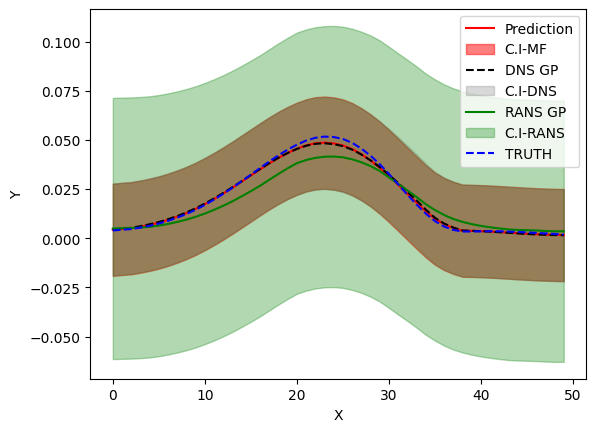

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig,ax=plt.subplots()
#DNS_test.shape[0]
i=4
x_pred = np.linspace(0,49,50).reshape(-1, 1)
# Calculate upper and lower confidence bounds
confidence = 1.96 # 95% confidence interval (approximate)
lower_bound = hf_mean_lin_mf_model[i]- confidence * np.sqrt(hf_var_lin_mf_model[i])
upper_bound = hf_mean_lin_mf_model[i]+ confidence * np.sqrt(hf_var_lin_mf_model[i])
ax.plot(hf_mean_lin_mf_model[i],color='r',label='Prediction')
ax.fill_between(x_pred.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='red', alpha=0.5, label='C.I-MF')



#for i in range(1):
#ax.fill_between((hf_mean_lin_mf_model[0] - 1.96*hf_std_lin_mf_model[0]).flatten(),
#(hf_mean_lin_mf_model[0] + 1.96*hf_std_lin_mf_model[0]).flatten(), color='r', alpha=0.3)
# ax.plot(RANS_test[:,i],color='k',linestyle='dotted',label='RANS')
ax.plot(hf_mean_high_gp_model[i],color='black',linestyle='--',label='DNS GP')
lower_bound_dns = hf_mean_high_gp_model[i]- confidence * np.sqrt(hf_var_high_gp_model[i])
upper_bound_dns = hf_mean_high_gp_model[i]+ confidence * np.sqrt(hf_var_high_gp_model[i])
ax.fill_between(x_pred.flatten(), lower_bound_dns.flatten(), upper_bound_dns.flatten(), color='gray', alpha=0.3, label='C.I-DNS')
ax.plot(lf_mean_low_gp_model[i],color='green',label='RANS GP')
lower_bound_rans = lf_mean_low_gp_model[i]- confidence * np.sqrt(lf_var_low_gp_model[i])
upper_bound_rans = lf_mean_low_gp_model[i]+ confidence * np.sqrt(lf_var_low_gp_model[i])
ax.fill_between(x_pred.flatten(), lower_bound_rans.flatten(), upper_bound_rans.flatten(), color='green', alpha=0.3, label='C.I-RANS')
ax.plot(DNS_test[:,i],color='b',linestyle='--',label='TRUTH')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()


x_data=x_pred
y_truth=DNS_test[:,i].reshape(-1,1)

print(y_truth.shape)
print(x_data.shape)
write_truth = np.stack((x_data,y_truth), axis = 1).reshape(-1,2)


e= "streamwise WSS"
hdrtxt='# xpoints','#ypoints'
np.savetxt('/content/drive/MyDrive/ColabNotebooks/Truth_40_e30Mag.dat', write_truth, delimiter='  ', header='Position\tMean', comments='' )
# np.savetxt('MF_70_e50_dns5_rans_8.dat', zip(write_mf), fmt=['%.3f','%.3f'])
# np.savetxt('LF_70_e50_dns5_rans_8.dat', zip(x_data,y_lf), fmt=['%.3f','%.3f'])
# np.savetxt('HF_70_e50_dns5_rans_8.dat', zip(x_data,y_hf), fmt=['%.3f','%.3f'])

In [ ]:
import numpy as np

# Example data arrays


# Create a structured array with position and mean as fields
data = np.zeros(len(position), dtype=[('Position', int), ('Mean', int)])
data['Position'] = position
data['Mean'] = mean

# Save the structured array to a .dat file
np.savetxt('data.dat', data, delimiter='\t', header='Position\tMean', comments='')

print("Data saved to data.dat")

NameError: ignored

In [ ]:
print(np.sqrt(hf_var_high_gp_model[i]))
# print(x_pred)
print(lf_var_low_gp_model)
print(hf_var_high_gp_model)
print(hf_var_lin_mf_model)

In [ ]:
# CI = np.ones(c[1])*1.96*hf_std_lin_mf_model[i,:].reshape(-1,1)
# CI=CI.T
# print(CI.shape)
i=0
x_data=x_pred
y_data=hf_mean_lin_mf_model[i].reshape(-1,1)
y_hf=hf_mean_high_gp_model[i].reshape(-1,1)
y_lf=lf_mean_low_gp_model[i].reshape(-1,1)
print(y_data.shape)
print(x_data.shape)
write_mf = np.stack((x_data,y_data), axis = 1).reshape(-1,2)
write_lf = np.stack((x_data,y_lf), axis = 1).reshape(-1,2)
write_hf = np.stack((x_data,y_hf), axis = 1).reshape(-1,2)
print(write_hf.shape)

e= "streamwise WSS"
hdrtxt='# xpoints','#ypoints'
np.savetxt('/content/drive/MyDrive/ColabNotebooks/MF_40_e30.dat', write_mf, delimiter='  ' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/LF_40_e30.dat', write_lf, delimiter='   ' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/HF_40_e30.dat', write_hf, delimiter='   ')

In [ ]:
# # Define the range of x values for prediction
# x_pred = np.linspace(0,50, 50).reshape(-1, 1)

# # Predict mean and variance at the given x values
# mean, var = model.predict(x_pred)

# # Calculate upper and lower confidence bounds
# confidence = 1.96  # 95% confidence interval (approximate)
# lower_bound = mean - confidence * np.sqrt(var)
# upper_bound = mean + confidence * np.sqrt(var)

# # Plot the data points, mean, and confidence interval
# plt.scatter(X_train, Y_train, color='red', label='Training data')
# plt.plot(x_pred, mean, color='blue', label='Mean')
# plt.fill_between(x_pred.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.3, label='Confidence interval')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('GPy Model Predictions with Confidence Interval')
# plt.legend()
# plt.show()

In [ ]:
fig,ax=plt.subplots()
for i in range(hf_mean_lin_mf_model.shape[0]):
   ax.plot(hf_mean_lin_mf_model[i])
ax.set_xlabel('X')
ax.set_ylabel('Y')


In [ ]:
# i=4
# y_true=DNS_test[:,i].reshape(-1,1)
# # y_rans=RANS_test[:,i].reshape(-1,1)


# write_truth = np.stack((x_data,y_true), axis = 1).reshape(-1,2)
# # write_rans = np.stack((x_data,y_rans), axis = 1).reshape(-1,2)


# np.savetxt('/content/drive/MyDrive/ColabNotebooks/Truth_40_e30.dat', write_truth, delimiter='  ' )
# np.savetxt('/content/drive/MyDrive/ColabNotebooks/RANS_70_e50.dat', write_rans, delimiter='   ' )


In [ ]:
print(lf_var_low_gp_model)
print(hf_var_high_gp_model)
print(hf_var_lin_mf_model)

In [ ]:
DNS_test=np.transpose(DNS_test)
fig,ax=plt.subplots()
for i in range(DNS_test.shape[1]):
   ax.plot(DNS_test[:,i])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(hf_mean_lin_mf_model[2],color='r',linestyle='dotted',label='Prediction')


In [ ]:

fig,ax=plt.subplots()
for i in range(RANS_full.shape[1]):
   ax.plot(RANS_full[:,i])
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [ ]:
  print(DNS_test[0])


In [ ]:
plt.figure(figsize=(12,8))
plt.ylabel('HF(x)')
plt.xlabel('LF(x)')

plt.plot(y_train_l[[0,2,4,7,8,10],:], y_train_h, color='purple',marker='*',)
plt.title('Mapping from low fidelity to high fidelity')
plt.legend(['HF-LF Correlation'], loc='lower center');